## About data set

There are 3 of datasets that we will use for the analysis:

1. order_dataset
order_id
* customer_id
* order_status
* order_purchase_timestamp
* order_approved_at
* order_delivered_carrier_date
* order_delivered_customer_date
* order_estimated_delivery_date

2. customers_dataset
* customer_id
* customer_unique_id
* customer_zip_code_prefix
* customer_city
* customer_state

3. order_payment_dataset
* order_id
* payment_sequential
* payment_type
* payment_installments
* payment_value

Customer segmentation is one of the most important marketing tools, because it can help a business to better understand its target audience. Segmenting customer helps in better understanding the customers and thus personalizing marketing and communication for each segment.

We will segment our customer using RFM analysis

* Recency (R) : Difference between days since last purchase and observed days.
* Frequency (F) : How many of transcaction each customer made?
* Monetary (M) : How much each customer spend ?

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from sklearn.cluster import KMeans

In [3]:
# load the order_dataset
df_order = pd.read_csv('orders_dataset.csv')
pd.set_option('display.max.columns',None)
# get the overview of the dataset
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:

#checking info from the dataset
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
#checking number of columns and row
df_order.shape

(99441, 8)

In [6]:

# load the order_payments_dataset
df_payment = pd.read_csv('order_payments_dataset.csv')
pd.set_option('display.max.columns',None)

#get the overview of the dataset
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
# checking info from dataset
df_payment.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [8]:
#check the number of columns and rows
df_payment.shape

(103886, 5)

In [9]:
# load the customers_dataset
df_cust = pd.read_csv('customers_dataset.csv')
pd.set_option('display.max.columns',None)

# get overview of the dataset
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
#checking info from the dataset
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
df_cust.shape

(99441, 5)

## Cleaning the Dataset

1. Removing Irrelevant Values
From orders_dataset, we will use only this column for the analysis. The columns are :

* order_id : the unique id of order
* customer_id : unique id of customer
* order_status : status of order (eg. Delivered, Shipped, etc)
* order_purchase_timestamp : time when the orders were made
* order_delivered_customer_date : time when the orders were succesfully arrived in customer
* order_estimated_delivery_date : estimation time when the orders were succesfully delivered to customers
We will drop order_approved_at and order_delivered_carrier_date, since we only want to consider the delivered time in this analysis.

In [12]:
#drop irrelevant columns
cols_del = df_order.iloc[0:,4:6]
df_order.drop(cols_del, axis=1, inplace=True )
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_delivered_customer_date  96476 non-null  object
 5   order_estimated_delivery_date  99441 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [13]:
# get the overview of the dataset
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00


From customers_dataset, we will use only this columns:

* customer_id : key to the orders dataset. Each order has a unique customer_id.
* customer_unique_id : unique identifier of the customer.
* customer_city : city of customer
* customer_state : the abbreviation of state location of customer



We will drop customer_zip_code_prefix.

In [14]:
#drop irrelevant columns
df_cust = df_cust.drop(columns=['customer_zip_code_prefix'])

In [15]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


From order_payment dataset, we will use all the columns:

* order_id: unique id of orders
* payment_sequential : sequence of customer payment per order_id
* payment_type : type of payment that customers used
* payment_value : number of payment


This is the data that we will use.

In [16]:
#drop irrelevant columns
df_payment = df_payment.drop(columns=['payment_installments'])

## Handling Missing Values

In [17]:
# Customer dataset

# There is no missing value in customer_dataset

#checking missing values of cust_dataset
df_cust.isna().sum()

customer_id           0
customer_unique_id    0
customer_city         0
customer_state        0
dtype: int64

In [18]:
# Payment dataset

# There is no missing value in payment_dataset

#checking missing values of payment_dataset
df_payment.isna().sum()

order_id              0
payment_sequential    0
payment_type          0
payment_value         0
dtype: int64

In [19]:
# Order dataset

# In order_dataset there are 2965 rows or 2.98% of missing value in order_delivered_customer_date columns.

# If the order_status = 'delivered', we will drop the missing value in that column.

# But if the status is not 'delivered' yet, we will fill the missing value with NaT value. Because the missing value 
# in that columns is an expected missing value. For example, if the status is still in category 'invoiced', then it 
# is certain that there is no data that can be recorded for order_delivered_customer_date since the customer have not 
# received their orders yet.

#checking missing values of order_dataset
total_missing = df_order.isna().sum()
percent_missing = df_order.isna().sum()/ len(df_order)*100
check_missing = pd.DataFrame({'column':df_order.columns, 'total_missing':total_missing, 'percent_missing':percent_missing})
check_missing

,column,total_missing,percent_missing
order_id,order_id,0,0.000000
customer_id,customer_id,0,0.000000
order_status,order_status,0,0.000000
order_purchase_timestamp,order_purchase_timestamp,0,0.000000
order_delivered_customer_date,order_delivered_customer_date,2965,2.981668
order_estimated_delivery_date,order_estimated_delivery_date,0,0.000000


In [20]:
# There is 8 rows of missing values in order_delivered_customer_date where the status is delivered. 
# Since it just only 8 rows, we will drop that rows.

# filtering rows where order_status is delivered and order_delivered_customer_date is missing
is_delivered = df_order.loc[(df_order['order_status']=='delivered') & (df_order['order_delivered_customer_date'].isna())]
is_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,NaN,2018-07-19 00:00:00


In [21]:
# get the index
index = is_delivered.index
index

Index([3002, 20618, 43834, 79263, 82868, 92643, 97647, 98038], dtype='int64')

In [22]:
# drop the rows based on index
df_order.drop(index,inplace=True)

In [23]:
#there are still 2957 rows of missing value, where the order_status != delivered
df_order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2957
order_estimated_delivery_date       0
dtype: int64

In [24]:
#fill the missing value with NaT (Not a Time)
df_order['order_delivered_customer_date']= df_order['order_delivered_customer_date'].fillna(pd.NaT)

In [25]:
# since we don't drop the missing value, still there are 2957 rows of NaT values
df_order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2957
order_estimated_delivery_date       0
dtype: int64

In [26]:
# the missing value now is converted to NaT
df_order.loc[df_order['order_delivered_customer_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,NaN,2017-09-15 00:00:00


In [27]:
df_order.shape

(99433, 6)

## Converting Data Types

In [28]:
# Customer dataset

# The customer_id,customer_unique_id, customer_city, customer_state are changed to object.

#change customer_id,customer_unique_id, customer_city, customer_state to object.
df_cust['customer_id'] = df_cust['customer_id'].astype(str)
df_cust['customer_unique_id'] = df_cust['customer_unique_id'].astype(str)
df_cust['customer_city'] = df_cust['customer_city'].astype(str)
df_cust['customer_state'] = df_cust['customer_state'].astype(str)

In [29]:
#change the item of customer_city to capitalized in each word
df_cust['customer_city']= df_cust['customer_city'].str.title()
df_cust.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,Campinas,SP


In [30]:
# Payment dataset

# We will change payment_sequential from int to object, because they are categorical and not will be used in aggregation.

#change payment_sequential to object
df_payment['payment_sequential']= df_payment['payment_sequential'].astype(str)

df_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            103886 non-null  object 
 1   payment_sequential  103886 non-null  object 
 2   payment_type        103886 non-null  object 
 3   payment_value       103886 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.2+ MB


In [31]:
# Order dataset

# We will change order_purchase_timestamp, order_delivered_customer_date, and order_estimated_delivery_date to datetime

#change the dates from string to datetime format
df_order['order_delivered_customer_date'] = pd.to_datetime(df_order['order_delivered_customer_date'])
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'])
df_order['order_estimated_delivery_date'] = pd.to_datetime(df_order['order_estimated_delivery_date'])

df_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99433 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99433 non-null  object        
 1   customer_id                    99433 non-null  object        
 2   order_status                   99433 non-null  object        
 3   order_purchase_timestamp       99433 non-null  datetime64[ns]
 4   order_delivered_customer_date  96476 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99433 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 5.3+ MB


## Removing Duplicate Values 

In [32]:
# Customer dataset

# There is no duplicated customer_id in customer dataset.

#checking duplicates in customer_id column
df_cust['customer_id'].duplicated().sum()


0

In [33]:
#checking duplicates in customer_unique_id column
df_cust['customer_unique_id'].duplicated().sum()

3345

In [34]:
# There are 3345 rows of duplicate customer_unique_id in this table, but we will not remove this duplicated 
# customer_unique_id because it is expected to have duplicated customer_unique_id in this table. It means that 
# each customer_unique_id can have several customer_id where customer_id itself represents order_id in another table.

# For example, lets take a look at one customer_unique_id in this table. We can see that, this table records 
# for one customer_unique_id, it can have multiple customer_id.

b=  df_cust[df_cust['customer_unique_id']== '00172711b30d52eea8b313a7f2cced02']
b

,customer_id,customer_unique_id,customer_city,customer_state
19299,1afe8a9c67eec3516c09a8bdcc539090,00172711b30d52eea8b313a7f2cced02,Jequie,BA
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,Jequie,BA


In [35]:
#checking unique values in customer_city column
df_cust['customer_city'].unique()

array(['Franca', 'Sao Bernardo Do Campo', 'Sao Paulo', ...,
       'Monte Bonito', 'Sao Rafael', 'Eugenio De Castro'], dtype=object)

In [36]:
list_city= df_cust['customer_city'].unique().tolist()
len(list_city)

# There are 4119 unique city from our dataset

4119

In [37]:
# Order dataset

# There is no duplicated order_id and customer_id on the dataset.
#checking duplicated values in order_id 
df_order['order_id'].duplicated().sum()

0

In [38]:
#checking duplicated values in customer_id
df_order['customer_id'].duplicated().sum()

0

In [39]:
#checking unique values in order_status
df_order['order_status'].value_counts()

order_status
delivered      96470
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

We can see that all order_status are unique

Payment dataset

There are 4446 rows of duplicate order_id in this table, but we will not remove this duplicated order_id because it is expected to have duplicated order_id in this table.

In [40]:
df_payment[df_payment['order_id'].duplicated()]

,order_id,payment_sequential,payment_type,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,7.80
...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,238.16


For example, lets take a look at one order_id in this table. We can see that, this table records for one order id, it can have multiple payment sequences. For one payment sequences, its also have a different total amount per sequences.

In [41]:
a= df_payment[df_payment['order_id']== 'ccf804e764ed5650cd8759557269dc13']
a

,order_id,payment_sequential,payment_type,payment_value
4346,ccf804e764ed5650cd8759557269dc13,19,voucher,1.68
14362,ccf804e764ed5650cd8759557269dc13,1,credit_card,2.20
16279,ccf804e764ed5650cd8759557269dc13,14,voucher,0.97
18876,ccf804e764ed5650cd8759557269dc13,15,voucher,1.11
21447,ccf804e764ed5650cd8759557269dc13,6,voucher,2.26
32393,ccf804e764ed5650cd8759557269dc13,26,voucher,23.10
38001,ccf804e764ed5650cd8759557269dc13,2,voucher,1.45
39132,ccf804e764ed5650cd8759557269dc13,25,voucher,1.53
40369,ccf804e764ed5650cd8759557269dc13,5,voucher,2.69
40387,ccf804e764ed5650cd8759557269dc13,3,voucher,1.15


Now, we will check if there is duplicate in categorical values

In [42]:
#checking unique values in payment_sequential
df_payment['payment_sequential'].unique()

array(['1', '2', '4', '5', '3', '8', '6', '7', '10', '11', '17', '19',
       '27', '12', '9', '15', '13', '14', '16', '25', '22', '26', '29',
       '28', '18', '21', '24', '23', '20'], dtype=object)

In [43]:
#checking unique values in payment_type
df_payment['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

There are 3 rows where payment_type is not defined, we will drop that rows.

In [44]:
#drop rows where the payment_type is not_defined
droprows = df_payment.loc[df_payment['payment_type']=='not_defined']
df_payment= df_payment[df_payment['payment_type']!='not_defined']
df_payment['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64

## Remove Outliers

For outlier, we only use numerical column in dataset. We will remove outlier in payment_value from payment_dataset.

In [45]:
#make a copy of dataset
df_payment_outlier = df_payment.copy()
df_payment_outlier

,order_id,payment_sequential,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,128.45
...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,369.54


In [46]:
#descriptive statistics of our dataset
df_payment_outlier.describe()

,payment_value
count,103883.000000
mean,154.104831
std,217.495628
min,0.000000
25%,56.800000
50%,100.000000
75%,171.840000
max,13664.080000


* Our payment dataset have 103.883 rows of observations
* Minimal value is 0 and max value is 13.664
* Mean of payment_value is 154
* The standard deviation > mean > median. A large standard deviation indicates that there is a lot of variance in the observed data around the mean. This indicates that the data observed is quite spread out.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


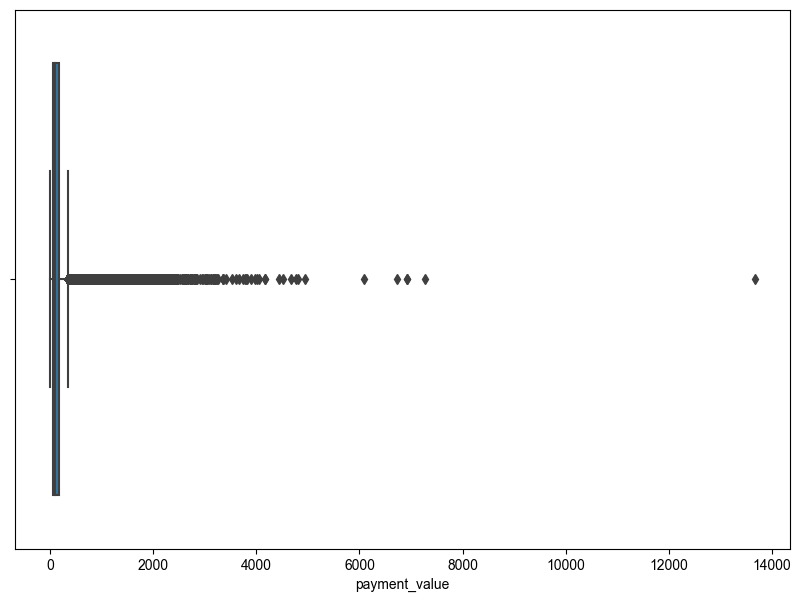

In [47]:
# get the visualization about outlier in our dataset
plt.figure(figsize=(10,7))
sns.boxplot(data=df_payment_outlier, x='payment_value')
sns.set_theme(style="darkgrid")

We can see that there are outlier in payment_value. Since the min value is 0, it makes our data have large variance. If we see the data, actually this far deviation happened because there is small minimal value that makes our variance is too far. Another reason is, it could also because there are buyers who buy in large quantities from our store, which is very common in e-commerce.

We will remove the outlier with z-score

Z score = (x -mean) / std. deviation

We can also calculate z-score using zscore() from scipy.

In [48]:
#import library scipy
import scipy.stats as stats

#calculate z-score
df_payment_outlier['zscores'] = abs(stats.zscore(df_payment_outlier['payment_value']))

In [49]:
# drop outlier if it is above thersehold 3
df_payment_outlier = df_payment_outlier.loc[df_payment_outlier['zscores'] < 3]
df_payment_outlier

,order_id,payment_sequential,payment_type,payment_value,zscores
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,99.33,0.251845
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,24.39,0.596405
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,65.71,0.406423
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,107.78,0.212993
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,128.45,0.117956
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,363.31,0.961887
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,96.80,0.263477
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,47.77,0.488908
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,369.54,0.990531


In [50]:
# dataset without outlier
df_payment_non_outlier = df_payment_outlier[['order_id', 'payment_sequential', 'payment_type', 'payment_value']]
df_payment_non_outlier

,order_id,payment_sequential,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,128.45
...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,369.54


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


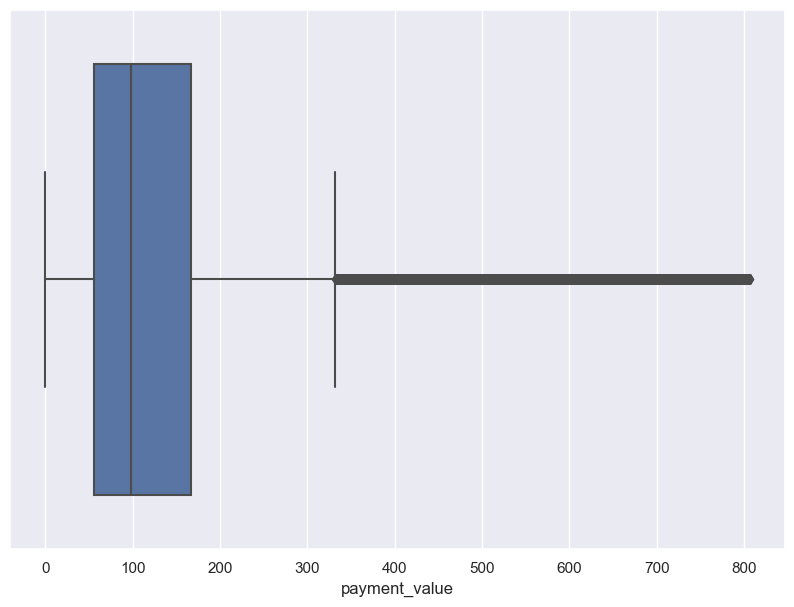

In [51]:
# get the visualization about our clean payment_dataset
plt.figure(figsize=(10,7))
sns.boxplot(data=df_payment_non_outlier, x='payment_value')
sns.set_theme(style="darkgrid")

From the boxplot we can see that our data is now clean from outliers.

## Combining the Dataset



Then, after cleaning each of our dataset, we will join it into a single dataset

In [52]:
# our final dataset
df_clean= df_order.merge(df_payment_non_outlier, how='inner', on='order_id')\
                  .merge(df_cust, on='customer_id')
df_clean

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_value,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,3,voucher,2.00,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2,voucher,18.59,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1,boleto,141.46,af07308b275d755c9edb36a90c618231,Barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1,credit_card,179.12,3a653a41f6f9fc3d2a113cf8398680e8,Vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...
102067,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,1,credit_card,85.08,6359f309b166b0196dbf7ad2ac62bb5a,Sao Jose Dos Campos,SP
102068,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,1,credit_card,195.00,da62f9e57a76d978d02ab5362c509660,Praia Grande,SP
102069,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,1,credit_card,271.01,737520a9aad80b3fbbdad19b66b37b30,Nova Vicosa,BA
102070,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,1,credit_card,441.16,5097a5312c8b157bb7be58ae360ef43c,Japuiba,RJ


In [53]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102072 entries, 0 to 102071
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102072 non-null  object        
 1   customer_id                    102072 non-null  object        
 2   order_status                   102072 non-null  object        
 3   order_purchase_timestamp       102072 non-null  datetime64[ns]
 4   order_delivered_customer_date  99043 non-null   datetime64[ns]
 5   order_estimated_delivery_date  102072 non-null  datetime64[ns]
 6   payment_sequential             102072 non-null  object        
 7   payment_type                   102072 non-null  object        
 8   payment_value                  102072 non-null  float64       
 9   customer_unique_id             102072 non-null  object        
 10  customer_city                  102072 non-null  object        
 11  

### Descriptive Statistics

In [54]:
# Categorical values
df_clean[['order_status','payment_sequential','customer_city','customer_state']].describe()

,order_status,payment_sequential,customer_city,customer_state
count,102072,102072,102072,102072
unique,8,29,4089,27
top,delivered,1,Sao Paulo,SP
freq,99037,97562,16012,43049


* There are 102.072 rows of observations in the clean dataset
* There are 8 unique values of order_status and the most values is 'delivered'
* There are 29 unique values of payment_sequential and the most values is 1
* 4089 unique city and the most values is Sao Paulo
* 27 unique values of state with the most values is SP

Numerical values

For numerical values , we will check :

* The measure of central tendency (Mean, Median)
* Measure of spread (Range, Quartile, Variance, Standard deviation)
* Measure of symmetry (Skewness)
* Measure of Peakedness (Kurtosis)

## Mean, Median, Min, Max, Std, Quartile 

In [55]:
# central tendency (mean, median), std, quartile
df_clean.describe()

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_value
count,102072,99043,102072,102072.000000
mean,2017-12-29 20:29:54.921545728,2018-01-13 00:59:56.304635648,2018-01-22 14:39:53.792616960,133.235651
min,2016-09-04 21:15:19,2016-10-11 13:46:32,2016-09-30 00:00:00,0.000000
25%,2017-09-10 11:49:42.750000128,2017-09-22 17:13:55,2017-09-29 00:00:00,56.220000
50%,2018-01-17 13:30:51.500000,2018-02-01 14:43:42,2018-02-14 00:00:00,98.490000
75%,2018-05-03 14:46:55.249999872,2018-05-15 15:45:44.500000,2018-05-25 00:00:00,166.630000
max,2018-10-17 17:30:18,2018-10-17 13:22:46,2018-11-12 00:00:00,806.460000
std,NaN,NaN,NaN,119.368338


* Total record of all cleaned dataset is 102.072 rows.
* Average of payment value is 133.23
* Standard deviation for payment value is 119.36
* The median of payment value 98.49 < average of the dataset 133.23 (right skew)
* The values of payment value are quite spread widely.

## Range

In [56]:
#calculate the range of payment_value
range_payment = max(df_clean['payment_value'])-min(df_clean['payment_value'])
print('Range payment_value: ',range_payment)

Range payment_value:  806.46


The range of payment_value is 806.46 which is quite large. A large range value indicates greater dispersion in the data.



# Variance

In [57]:
# calculate variance of payment_value
var_pay = df_clean['payment_value'].var().round(2)
print('Variance of payment_value :',var_pay)

Variance of payment_value : 14248.8


The payment value is widely spread within the range of the data.

# Skewness

In [58]:
#calculate the skewness of payment_value
skew_pay = df_clean['payment_value'].skew().round(2)
print('Skeweness of payment_value:', skew_pay)

Skeweness of payment_value: 2.3


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='payment_value', ylabel='Count'>

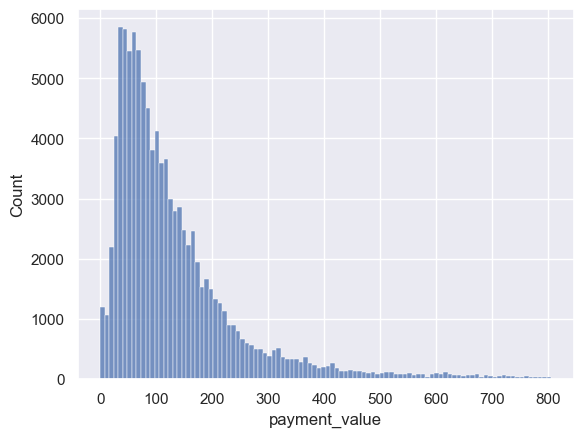

In [59]:
sns.histplot(data=df_clean, x='payment_value',bins=100)


# Kurtosis

In [60]:
#calculate the kurtosis of payment_value
kurt_pay = df_clean['payment_value'].kurtosis().round(2)
print('Kurtosis of payment_value:', kurt_pay)

Kurtosis of payment_value: 6.73


It means that our dataset has heavier tails than a normal distribution

# Time values

We will calculate the difference between the time of purchase ('order_purchase_timestamp') and the time of arrival ('order_delivered_customer_date') for status order = 'delivered' to see how many days it takes from the first time a buyer purchases an order on our e-commerce until the items finally arrives in their hands. Then we will check whether this arrival time is not much different from the estimated time given ('order_estimated_delivery_date').

In [61]:
#create a new dataframe when order_status id delivered
df_deliver = pd.DataFrame(df_clean.loc[df_clean['order_status']=='delivered'])
df_deliver.isna().sum()
     

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_value                    0
customer_unique_id               0
customer_city                    0
customer_state                   0
dtype: int64

In [62]:
# assign new variable that calculated difference between purchase and delivery 
diff_time=  df_deliver['order_delivered_customer_date'] - df_deliver['order_purchase_timestamp']
#extract the days only
diff_time_days= diff_time.dt.days
# assign this variable to data frame
df_deliver['diff_time_days'] = diff_time_days

In [63]:

# assign new variable that calculated difference between purchase and estimated delivery 
estimate = df_deliver['order_estimated_delivery_date']- df_deliver['order_purchase_timestamp']
#extract the days only
estimate_days= estimate.dt.days
# assign this variable to data frame
df_deliver['estimate_days'] = estimate_days

In [64]:
#calculate the difference between actual interval delivered and estimated interval delivered
is_estimate = estimate_days - diff_time_days
df_deliver['is_estimate'] = is_estimate

In [65]:
# create a new aggregated data frame
time_calculate= df_deliver.groupby('order_id')[['diff_time_days','estimate_days','is_estimate']].mean()
time_calculate

,diff_time_days,estimate_days,is_estimate
order_id,,,
00010242fe8c5a6d1ba2dd792cb16214,7.0,15.0,8.0
00018f77f2f0320c557190d7a144bdd3,16.0,18.0,2.0
000229ec398224ef6ca0657da4fc703e,7.0,21.0,14.0
00024acbcdf0a6daa1e931b038114c75,6.0,11.0,5.0
00042b26cf59d7ce69dfabb4e55b4fd9,25.0,40.0,15.0
...,...,...,...
fffc94f6ce00a00581880bf54a75a037,17.0,24.0,7.0
fffcd46ef2263f404302a634eb57f7eb,9.0,17.0,8.0
fffce4705a9662cd70adb13d4a31832d,4.0,17.0,13.0


In [66]:
# total rows in time_calculate data frame matches the count distinct order_id
df_deliver['order_id'].nunique()

94792

In [67]:

#descriptive statistics
time_calculate.describe()

,diff_time_days,estimate_days,is_estimate
count,94792.000000,94792.000000,94792.000000
mean,12.059309,23.330545,11.271236
std,9.517351,8.741226,10.170851
min,0.000000,2.000000,-189.000000
25%,6.000000,18.000000,7.000000
50%,10.000000,23.000000,12.000000
75%,15.000000,28.000000,16.000000
max,209.000000,155.000000,146.000000


In [68]:
#calculate % of late
is_late= time_calculate['is_estimate'] <0
total_late = ((is_late.sum())/ (df_deliver['order_id'].nunique()) * 100).round(2)
total_late

7.55

Insight:

* On average it takes 10-12 days, from customers' purchases on website until their orders delivered to them.
* Some take from 0 days to 209 days until the item arrives.
* If the interval of estimated_delivered between actual interval delivered is below zero, it means that the orders experienced a slight delay because it exceeded the estimated delivery target given.
* From the data 7.55% of the orders experienced late delivery.

# EDA and Visualization

# Number of orders per month

We will count distinct all the order id made per month using order_purchase_timestamp.

In [69]:
#create a copy df
df_num = df_clean.copy()
#extract month of time purchased
df_num['month'] = df_num['order_purchase_timestamp'].dt.month
#extract year of time purchased
df_num['year']= df_num['order_purchase_timestamp'].dt.year
#change the data type to str
df_num['month-year'] = df_num['order_purchase_timestamp'].dt.strftime('%b') + '-' + df_num['order_purchase_timestamp'].dt.strftime('%Y')
df_num.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_value,customer_unique_id,customer_city,customer_state,month,year,month-year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP,10,2017,Oct-2017
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,3,voucher,2.00,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP,10,2017,Oct-2017
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2,voucher,18.59,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP,10,2017,Oct-2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1,boleto,141.46,af07308b275d755c9edb36a90c618231,Barreiras,BA,7,2018,Jul-2018
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1,credit_card,179.12,3a653a41f6f9fc3d2a113cf8398680e8,Vianopolis,GO,8,2018,Aug-2018


In [70]:
#create a new dataframe to get num order per month
num_order = pd.DataFrame(df_num.groupby(['year','month','month-year'])['order_id'].nunique())
num_order


order_id
year month month-year          
2016 9     Sep-2016           3
     10    Oct-2016         317
     12    Dec-2016           1
2017 1     Jan-2017         787
     2     Feb-2017        1752
     3     Mar-2017        2629
     4     Apr-2017        2344
     5     May-2017        3629
     6     Jun-2017        3186
     7     Jul-2017        3983
     8     Aug-2017        4247
     9     Sep-2017        4184
     10    Oct-2017        4530
     11    Nov-2017        7430
     12    Dec-2017        5602
2018 1     Jan-2018        7161
     2     Feb-2018        6661
     3     Mar-2018        7089
     4     Apr-2018        6787
     5     May-2018        6716
     6     Jun-2018        6048
     7     Jul-2018        6160
     8     Aug-2018        6400
     9     Sep-2018          14
     10    Oct-2018           4

In [71]:
num_order.describe()

,order_id
count,25.000000
mean,3906.560000
std,2654.050145
min,1.000000
25%,1752.000000
50%,4184.000000
75%,6400.000000
max,7430.000000


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and w

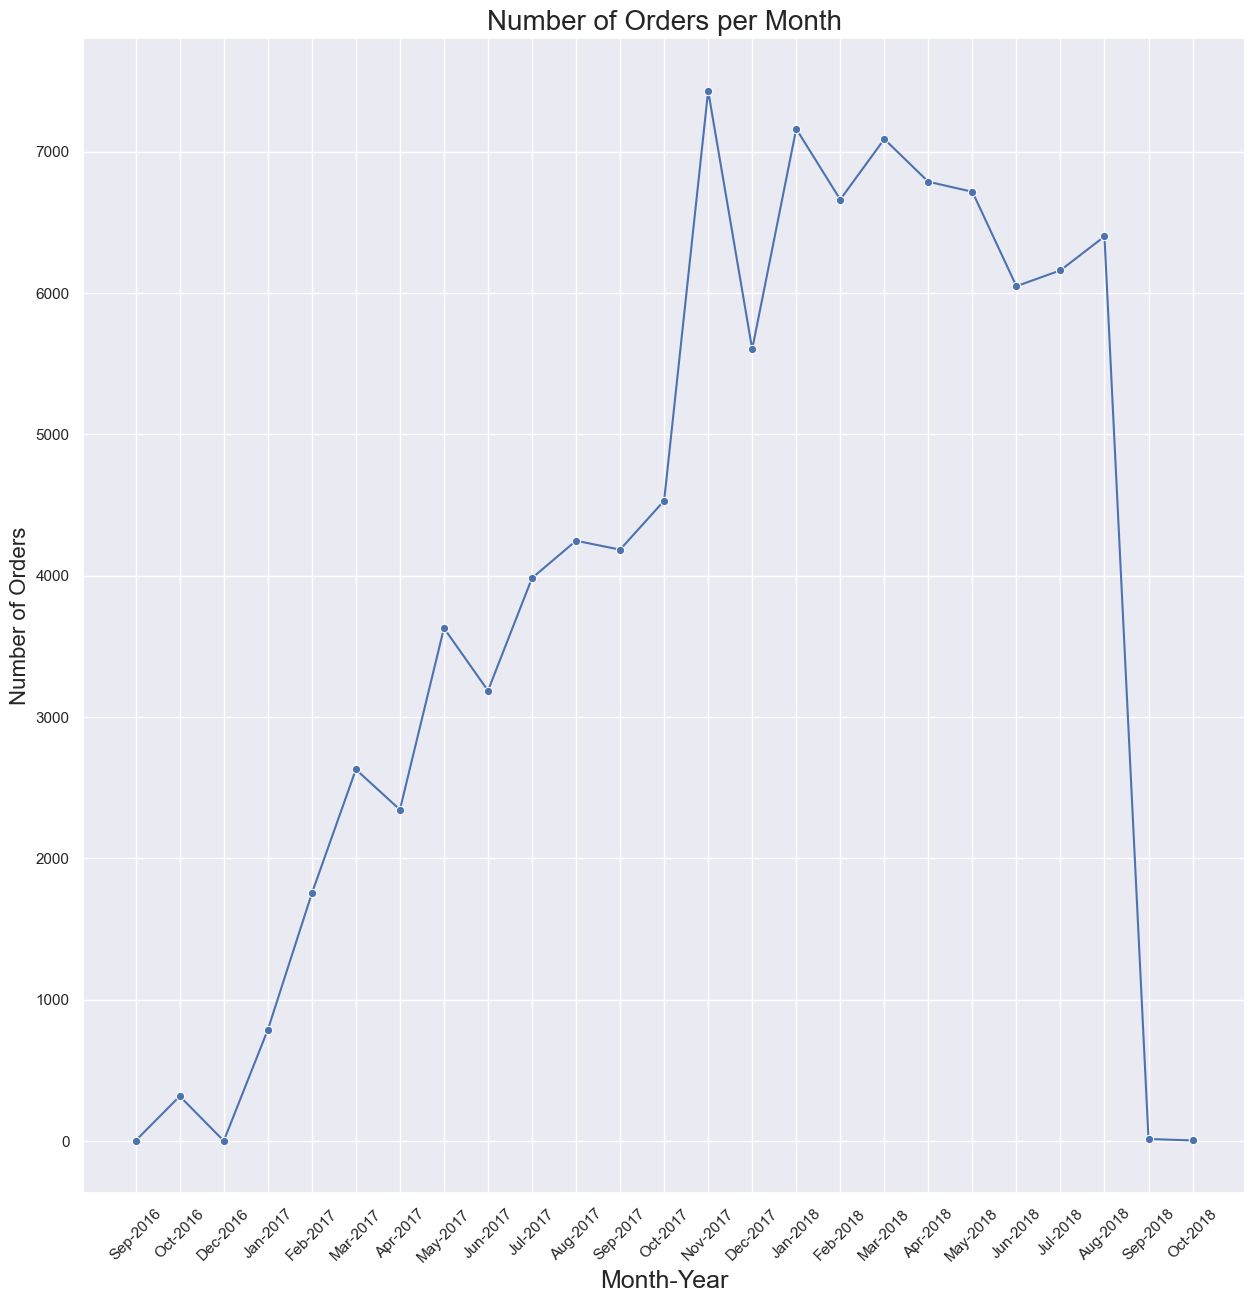

In [72]:
#timeline chart
plt.figure(figsize=(15,15))
sns.lineplot(data=num_order, x='month-year', y='order_id', marker='o')
plt.title('Number of Orders per Month', fontsize=20)
plt.xlabel('Month-Year',fontsize=18)
plt.ylabel('Number of Orders',fontsize=16)
plt.xticks(rotation=45)
plt.show()

Insight:

* Overall number of orders tend to increase from Sep 2016 until Aug 2018, but then a massive decrease happen from Sep-Oct 2018
* Highest peak of number of order was in Nov 2017 = 7430 order. But in the next month, the number of order decrease and stagnant along the way.
* From Sep 2016 until July 2017, the number of order was in below the median and average. But start from Aug 2017 until Aug 2018, the number of order per month always above the median and the average. So in this interval span 1 year, there is a growth in number of orders every month.
* The massive decrease of number of order that happen in Sep-Oct 2018, needs to be investigate further.

Recommendation:

* Plan to launch a new product right after the end year sale, so it will bringing back the customer again.
* Announce that will be a slightly delay of delivery due to high season, so the customer don't feel disappointed and will continue to shop with us in the future.
-Maintain customer engagement with customer so they can stay loyal to shop with us

## Daily orders trend

In [73]:

#create copy of df
df_day = df_num.copy()
#extract day of time purchased
df_day['day']= df_day['order_purchase_timestamp'].dt.day_name()
df_day.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_value,customer_unique_id,customer_city,customer_state,month,year,month-year,day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP,10,2017,Oct-2017,Monday
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,3,voucher,2.00,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP,10,2017,Oct-2017,Monday
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2,voucher,18.59,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP,10,2017,Oct-2017,Monday
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1,boleto,141.46,af07308b275d755c9edb36a90c618231,Barreiras,BA,7,2018,Jul-2018,Tuesday
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1,credit_card,179.12,3a653a41f6f9fc3d2a113cf8398680e8,Vianopolis,GO,8,2018,Aug-2018,Wednesday


In [74]:
# create a new df 
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
num_day = df_day.groupby('day')['order_id'].nunique().reindex(week_day)
num_day= pd.DataFrame(num_day)
num_day.reset_index(inplace=True)
num_day.columns = ['days','number_of_orders']
num_day

,days,number_of_orders
0,Monday,15888
1,Tuesday,15689
2,Wednesday,15275
3,Thursday,14483
4,Friday,13874
5,Saturday,10690
6,Sunday,11765


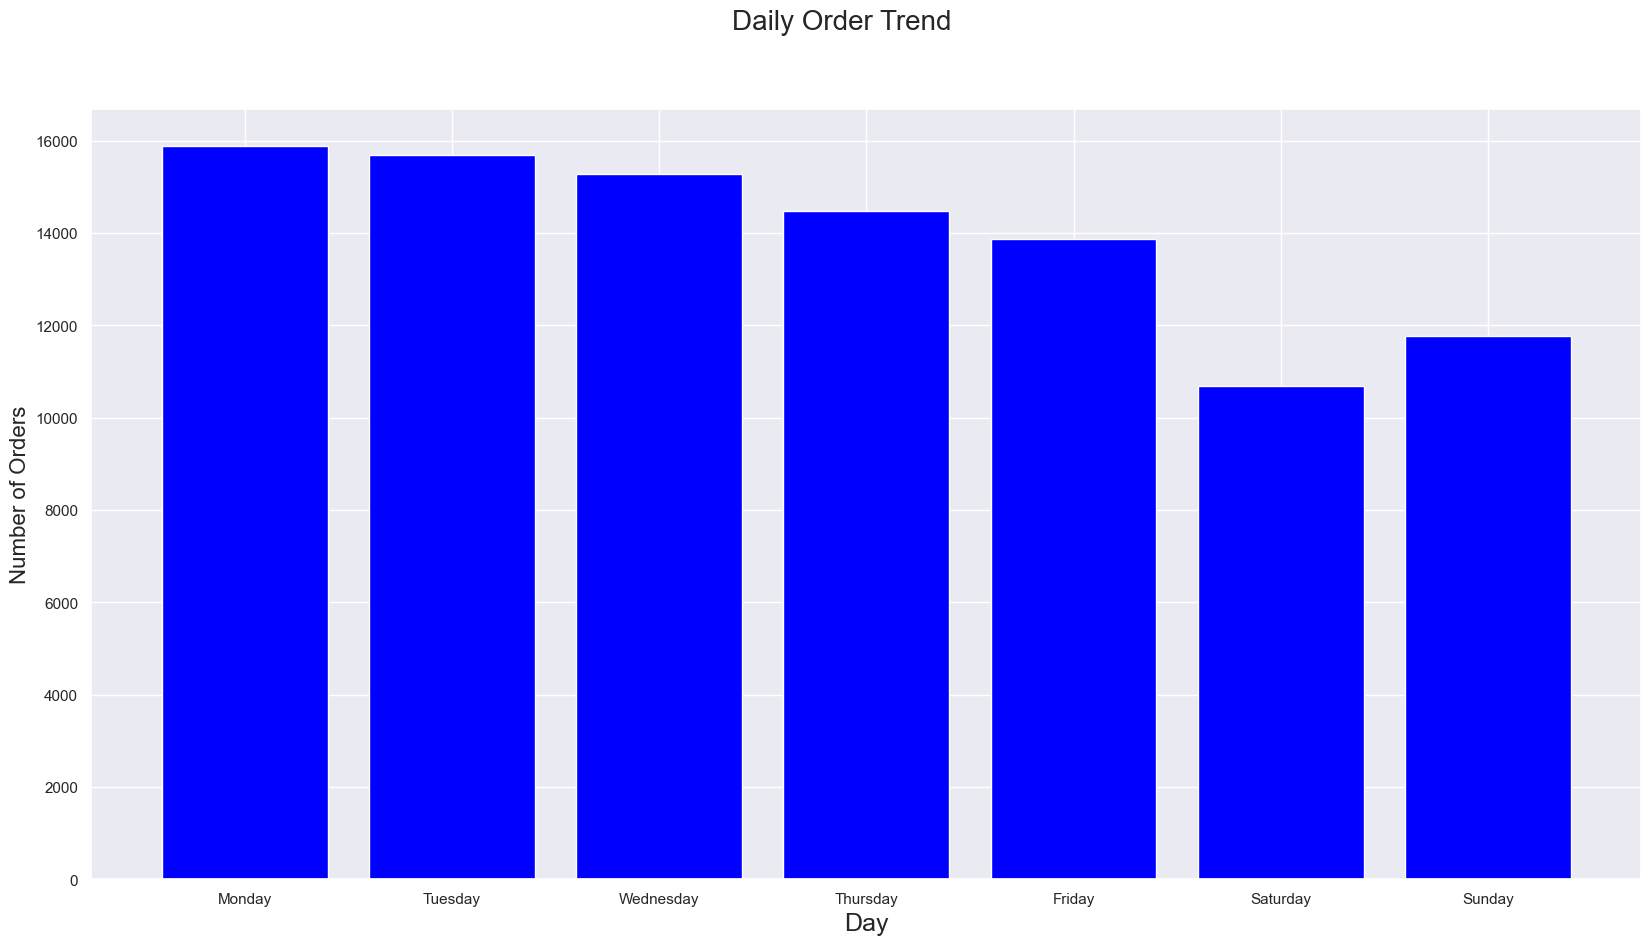

In [75]:
#timeline chart
fig = plt.figure(figsize=(20, 10))

fig.suptitle('Daily Order Trend', fontsize=20)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Number of Orders', fontsize=16)

x = num_day['days']
y = num_day['number_of_orders']
plt.bar(x, y,color='blue')
plt.show()
     

## Insight :

* Most of the transactions occur in weekdays (Monday - Friday), while weekend have less number of transactions.
* From chart we can see that Monday is the day which have most number of transactions, but not significant comparing to other weekdays.
* While Saturday is day with least transaction occur.


## Recommendation:

* Start to give discount or special bundle especially on weekdays.

## Percentage of orders per payment type

In [76]:
#create a new df
payment_type = df_day.groupby('payment_type')['order_id'].nunique()
order_pay =(payment_type/ df_day['order_id'].nunique() *100).round(2)
order_pay= pd.DataFrame(order_pay)
order_pay.reset_index(inplace=True)
order_pay.columns=['payment_type','number_of_orders']
order_pay

,payment_type,number_of_orders
0,boleto,19.95
1,credit_card,76.85
2,debit_card,1.54
3,voucher,3.94


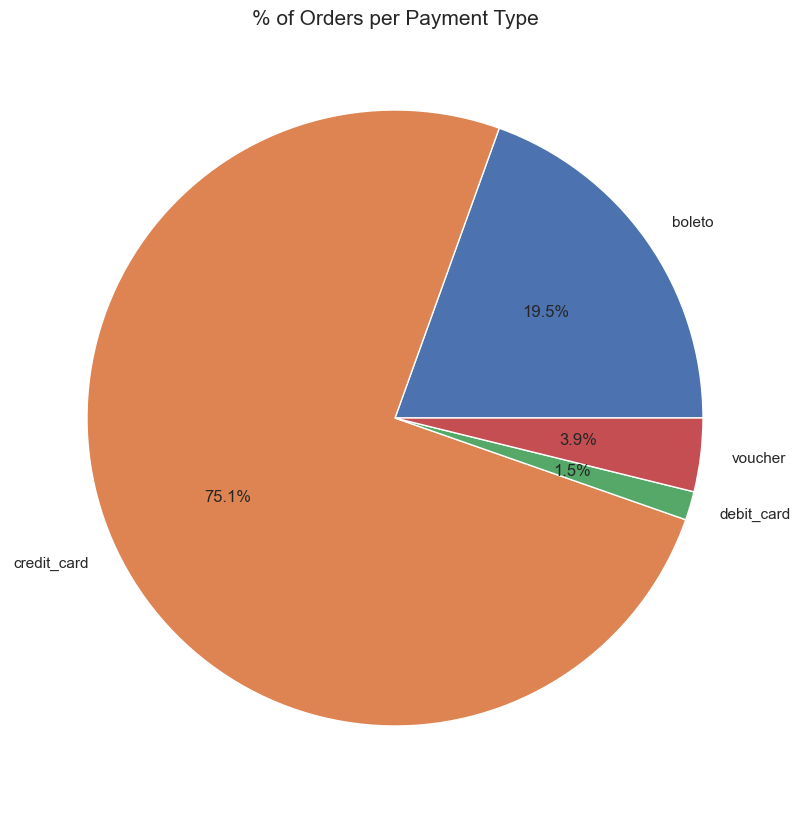

In [77]:
#bar chart
plt.figure(figsize=(15,10))
plt.title('% of Orders per Payment Type',fontsize=15)
plt.pie(order_pay['number_of_orders'],labels=order_pay['payment_type'],autopct='%1.1f%%')
plt.show()

FYI : Boleto means 'ticket' and is a popular Brazilian cash payment method. A 'boleto' is a printed or virtual voucher with a barcode, payment details, and customer information.

Insight:

* Only total 5.4 % of our customer using Voucher and Debit card to shop with us.
* 75% of transaction paid with credit_card while Boleto in second place with almost 19.5%


Recommendation:

* Cooperate with banks to give additional discounts or easy installments when our customer using credit cards
* Start to give discount or promo when customer using Boleto

## Advanced Assignment - Customer Segmentation 

# Recency, Frequency, Monetary (RFM Analysis)
Customer segmentation is one of the most important marketing tools, because it can help a business to better understand its target audience.Segmenting customer helps in better understanding the customers and thus personalizing marketing and communication for each segment.

We will segment our customer using RFM analysis

1. Recency (R): difference between days since last purchase and observed days.
Frequency (F): how many of transcaction each customer made?
Monetary (M): how much each customer spend?

## Data Preperation

In [78]:
#data with outlier
df = df_order.merge(df_payment, how='inner', on='order_id')\
                  .merge(df_cust, on='customer_id')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_value,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,3,voucher,2.00,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2,voucher,18.59,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1,boleto,141.46,af07308b275d755c9edb36a90c618231,Barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1,credit_card,179.12,3a653a41f6f9fc3d2a113cf8398680e8,Vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...
103870,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,1,credit_card,85.08,6359f309b166b0196dbf7ad2ac62bb5a,Sao Jose Dos Campos,SP
103871,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,1,credit_card,195.00,da62f9e57a76d978d02ab5362c509660,Praia Grande,SP
103872,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,1,credit_card,271.01,737520a9aad80b3fbbdad19b66b37b30,Nova Vicosa,BA
103873,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,1,credit_card,441.16,5097a5312c8b157bb7be58ae360ef43c,Japuiba,RJ


To calculate recency, we will use timebound + 1 days since our last order transaction as our observed day.

In [79]:
# get our last order transaction
last= df['order_purchase_timestamp'].max()
last

Timestamp('2018-10-17 17:30:18')

In [80]:
#observed day = + 1 days since last transactions
timebound = last + timedelta(days=1)
timebound

Timestamp('2018-10-18 17:30:18')

In [81]:
# total unique customer id
df['customer_unique_id'].nunique()

96085

# Calculate RFM Metrics
* Recency : our observed day minus last order transactions (max date) of each customer
* Frequency : count of order id
* Monetary Value : sum of payment value


We calculate all variable for each customer (use group by here)

In [82]:

#calculate RFM metrics
df_rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp' : lambda x : (timebound- x.max()).days,
    'order_id' : 'count',
    'payment_value' : 'sum'})

In [83]:
#rename the column for easy interpretation
df_rfm.reset_index(inplace=True)
df_rfm.rename(columns= {'order_purchase_timestamp': 'Recency',
                        'order_id': 'Frequency',
                        'payment_value': 'Monetary Value'},inplace= True)

Result: our RFM dataframe per each customer

In [84]:

#our RFM dataframe
df_rfm

,customer_unique_id,Recency,Frequency,Monetary Value
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
2,0000f46a3911fa3c0805444483337064,586,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89
...,...,...,...,...
96080,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,2067.42
96081,fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58
96082,ffff371b4d645b6ecea244b27531430a,618,1,112.46
96083,ffff5962728ec6157033ef9805bacc48,169,1,133.69


Then, we subset the dataframe for only numerical column to go to the next step which are centering and scaling the variables.

In [85]:
#subset only numerical varriable
rfm= df_rfm[['Recency', 'Frequency', 'Monetary Value']]
rfm

,Recency,Frequency,Monetary Value
0,161,1,141.90
1,164,1,27.19
2,586,1,86.22
3,370,1,43.62
4,337,1,196.89
...,...,...,...
96080,496,1,2067.42
96081,311,1,84.58
96082,618,1,112.46
96083,169,1,133.69


In [86]:
# get a copy of rfm dataset
rfm1= rfm.copy()
rfm1

,Recency,Frequency,Monetary Value
0,161,1,141.90
1,164,1,27.19
2,586,1,86.22
3,370,1,43.62
4,337,1,196.89
...,...,...,...
96080,496,1,2067.42
96081,311,1,84.58
96082,618,1,112.46
96083,169,1,133.69


# Data Pre-processing (Unskew the Data)

C:\Users\PC\AppData\Local\Temp\ipykernel_20216\2264030123.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(rfm1['Recency'])
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN bef

C:\Users\PC\AppData\Local\Temp\ipykernel_20216\2264030123.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(rfm1['Frequency'])
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN b

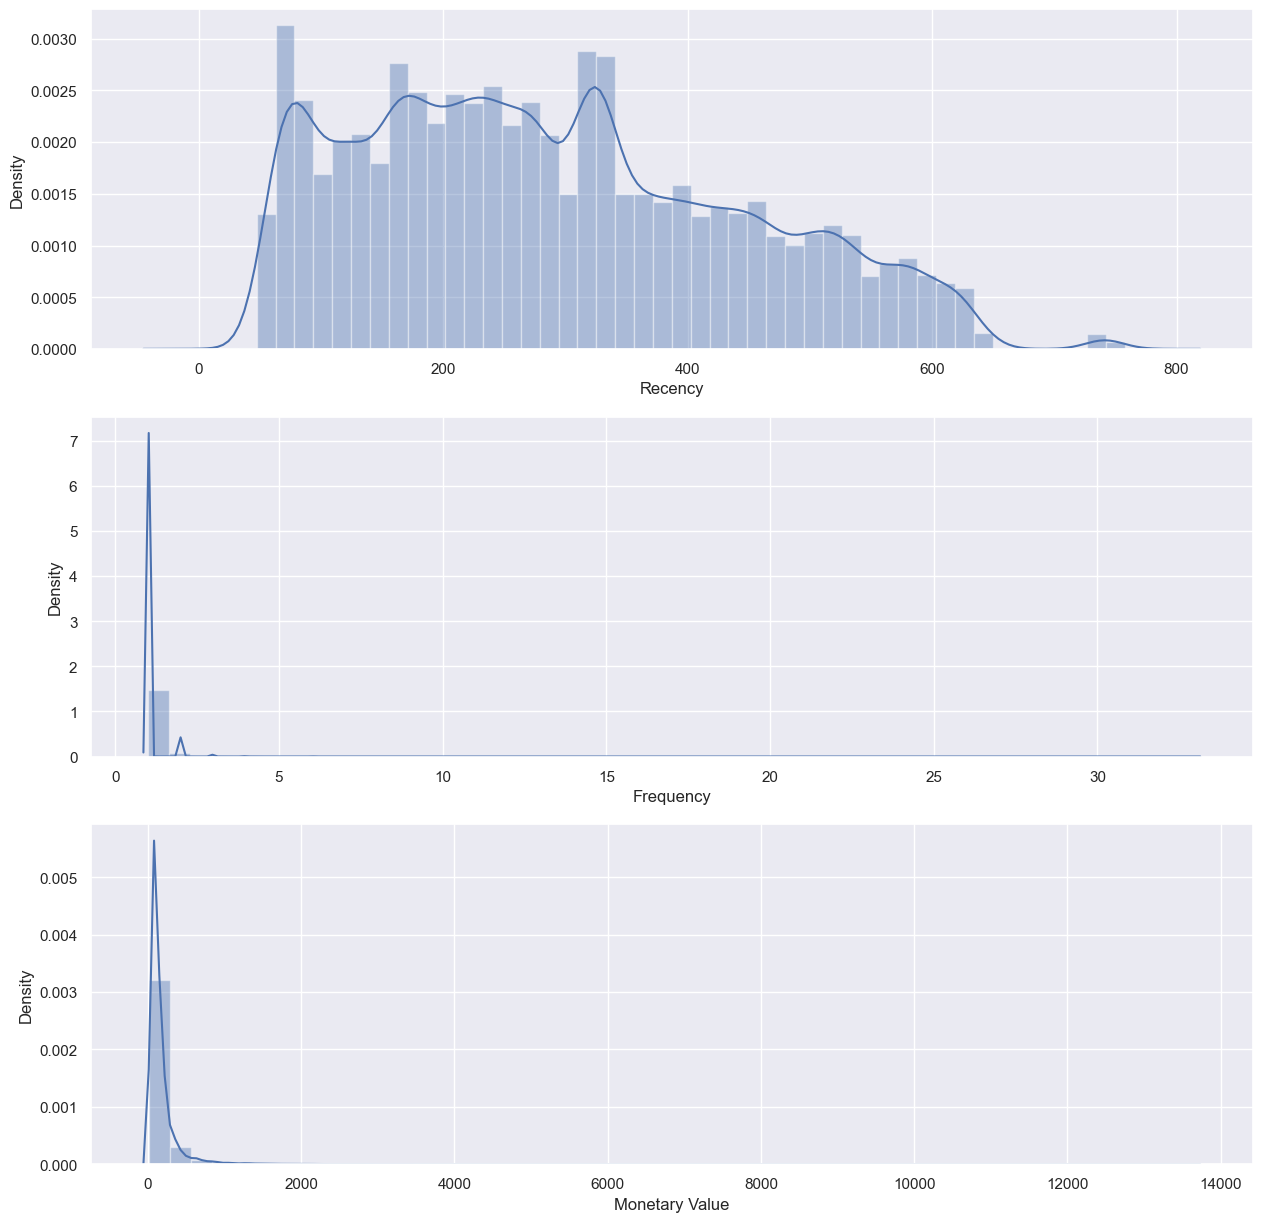

In [87]:
# get visualization of distribution 
fig = plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(rfm1['Recency'])
plt.subplot(3, 1, 2); sns.distplot(rfm1['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(rfm1['Monetary Value'])
plt.show()

From the chart above, we can se that our variable is skew. Then we will unskew only the monetary value using log transformation.

In [88]:
#unskew the data with data transformations
rfm1['Monetary Value']= np.log(rfm1['Monetary Value'])

In [89]:
#  after unskew the monetary value
rfm1

,Recency,Frequency,Monetary Value
0,161,1,4.955123
1,164,1,3.302849
2,586,1,4.456902
3,370,1,3.775516
4,337,1,5.282645
...,...,...,...
96080,496,1,7.634057
96081,311,1,4.437698
96082,618,1,4.722598
96083,169,1,4.895524


C:\Users\PC\AppData\Local\Temp\ipykernel_20216\551764549.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(rfm1['Recency'])
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

C:\Users\PC\AppData\Local\Temp\ipykernel_20216\551764549.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(rfm1['Frequency'])
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

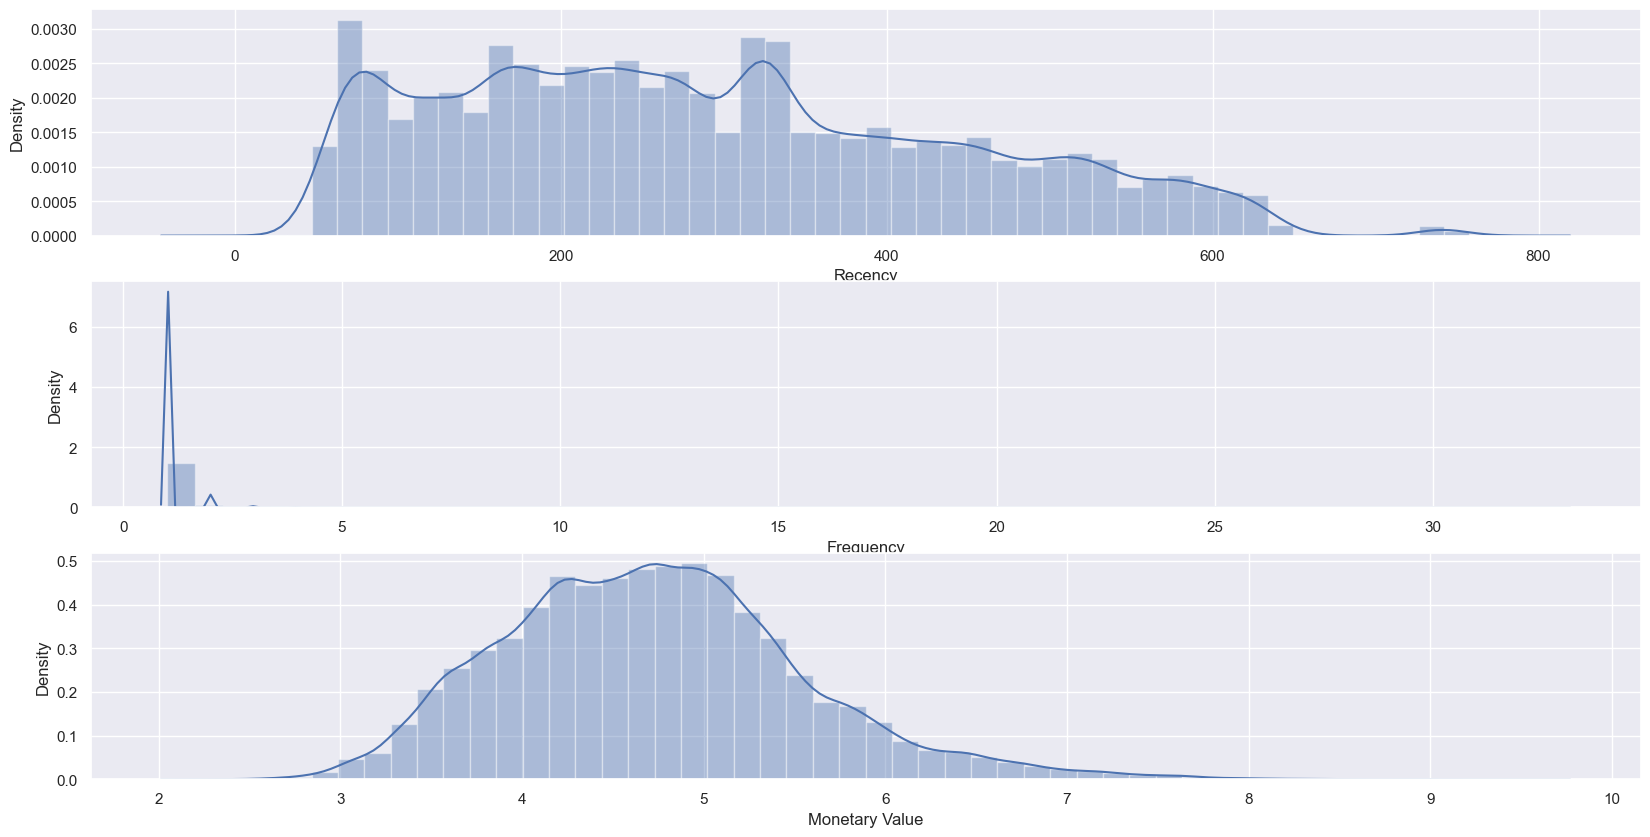

In [90]:

# visualize the distribution again
fig = plt.figure(figsize=(20, 10))
plt.subplot(3, 1, 1); sns.distplot(rfm1['Recency'])
plt.subplot(3, 1, 2); sns.distplot(rfm1['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(rfm1['Monetary Value'])
plt.show()

Result : the Monetary variable is not skew now.

In [91]:
# copy of log transformation
df_log = rfm1.copy()

# Standarized Variable

In [92]:
#using StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_log)

StandardScaler()

In [93]:

#normalize the variables
df_normalized = scaler.transform(df_log)

In [94]:
# store for clustering
df_normalized = pd.DataFrame(data= df_normalized, index= rfm1.index, columns = rfm1.columns)
df_normalized
     

,Recency,Frequency,Monetary Value
0,-0.832735,-0.175273,0.285230
1,-0.813179,-0.175273,-1.730571
2,1.937745,-0.175273,-0.322607
3,0.529689,-0.175273,-1.153910
4,0.314569,-0.175273,0.684813
...,...,...,...
96080,1.351055,-0.175273,3.553575
96081,0.145081,-0.175273,-0.346037
96082,2.146346,-0.175273,0.001545
96083,-0.780585,-0.175273,0.212518


In [95]:
# Determine Cluster Number
# Elbow Method

#Fit k-means and calculate SSE for eack k
sse= {}
for k in range(1,7):
  kmeans= KMeans(n_clusters=k)
  kmeans.fit(df_normalized)
  sse[k] = kmeans.inertia_

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

{1: 288255.0000000007, 2: 220718.78697360068, 3: 175610.07669003843, 4: 134548.01714571938, 5: 107824.38354835339, 6: 92359.60234138604}


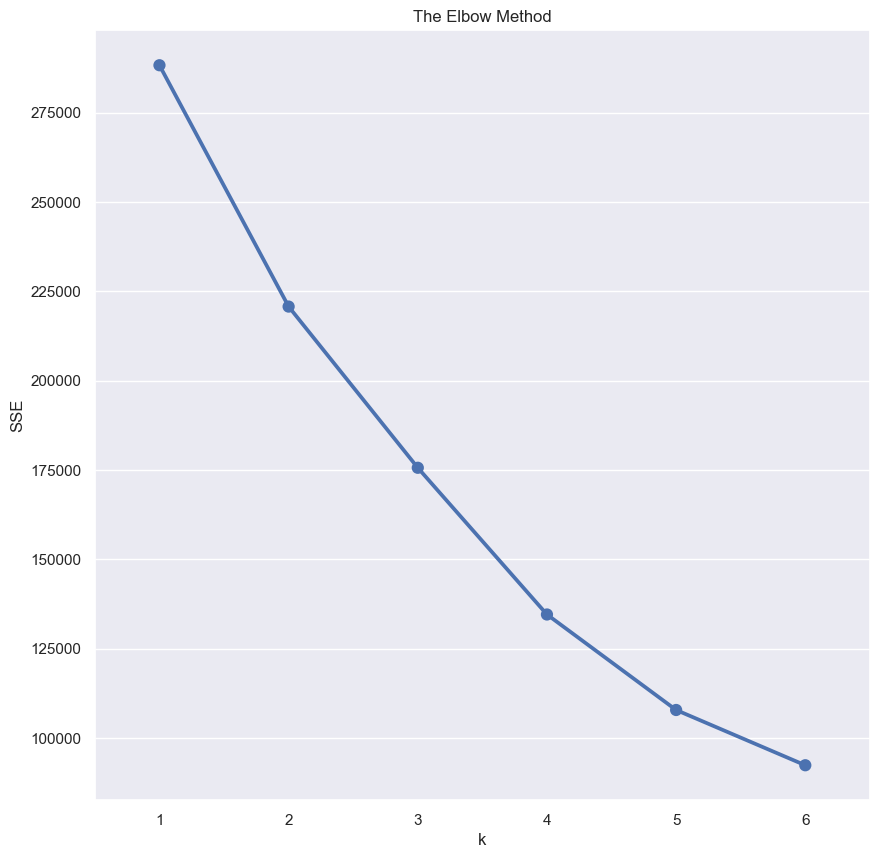

In [96]:

#plot SSE for each k
fig = plt.figure(figsize=(10, 10))
plt.title('The Elbow Method')
plt.xlabel('k');plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show

print(sse)

From elbow method, we can see that the optimal number of cluster is around 4 or 5 cluster.

In [97]:
# Running K-Means Clustering on Pre-Processing Data
# After determine the number of cluster = 5, then we run the kmeans clustering

#run kmeans clustering with n_cluster = 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_normalized)
cluster_labels = kmeans.labels_

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [98]:

#assign the label to raw data
rfm_k2= df_rfm.assign(Cluster=cluster_labels)
     

In [99]:
# Aggregate function for each cluster
rfm_k2.groupby('Cluster')[['Recency', 'Frequency', 'Monetary Value']].agg(['mean', 'median'])



Recency         Frequency        Monetary Value         
               mean median       mean median           mean   median
Cluster                                                             
0        477.837508  470.0   1.003028    1.0     119.002045   97.365
1        284.538281  268.0   2.233122    2.0     249.196013  163.890
2        225.659654  222.0   1.000000    1.0     319.102122  210.850
3        197.091600  197.0   1.000841    1.0      69.356855   66.290
4        341.293478  326.5  10.413043    9.0     262.967500  147.365

From result above, we can see that most of our cluster have similar mean and median of Frequency. It means that most of our customers are one time purchasers and only few customers with repeated order. Due to this case, we will run the cluster once again but only use Recency and Monetary Value as our variable.

## Use Recency and Monetary Values Only

## Data Preparation

In [101]:
#get a copy of dataset
df1= df.copy()
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_value,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,3,voucher,2.00,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2,voucher,18.59,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1,boleto,141.46,af07308b275d755c9edb36a90c618231,Barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1,credit_card,179.12,3a653a41f6f9fc3d2a113cf8398680e8,Vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...
103870,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,1,credit_card,85.08,6359f309b166b0196dbf7ad2ac62bb5a,Sao Jose Dos Campos,SP
103871,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,1,credit_card,195.00,da62f9e57a76d978d02ab5362c509660,Praia Grande,SP
103872,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,1,credit_card,271.01,737520a9aad80b3fbbdad19b66b37b30,Nova Vicosa,BA
103873,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,1,credit_card,441.16,5097a5312c8b157bb7be58ae360ef43c,Japuiba,RJ


# Calculate RM Metrics

In [102]:

#calculate RM metrics
df_rm = df1.groupby('customer_unique_id').agg({
    'order_purchase_timestamp' : lambda x : (timebound- x.max()).days,
    'payment_value' : 'sum'})

In [103]:
#rename the column for easy interpretation
df_rm.reset_index(inplace=True)
df_rm.rename(columns= {'order_purchase_timestamp': 'Recency',
                        'payment_value': 'Monetary Value'},inplace= True)

In [104]:
#our RM dataframe
df_rm

,customer_unique_id,Recency,Monetary Value
0,0000366f3b9a7992bf8c76cfdf3221e2,161,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,27.19
2,0000f46a3911fa3c0805444483337064,586,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,370,43.62
4,0004aac84e0df4da2b147fca70cf8255,337,196.89
...,...,...,...
96080,fffcf5a5ff07b0908bd4e2dbc735a684,496,2067.42
96081,fffea47cd6d3cc0a88bd621562a9d061,311,84.58
96082,ffff371b4d645b6ecea244b27531430a,618,112.46
96083,ffff5962728ec6157033ef9805bacc48,169,133.69


In [105]:

#subset numerical for r and m
rm=df_rm[['Recency', 'Monetary Value']]
rm

,Recency,Monetary Value
0,161,141.90
1,164,27.19
2,586,86.22
3,370,43.62
4,337,196.89
...,...,...
96080,496,2067.42
96081,311,84.58
96082,618,112.46
96083,169,133.69


# Data Pre-Processing (Unskew the Data)